### Data exploration and analysis :

In [33]:
import pandas as pd
import os
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import shutil
import numpy as np

In [34]:
data = pd.read_csv("dataset/metadata.csv")
image_folder = "dataset/consolidated_dataset"
output_folder = "dataset/processed_dataset"
os.makedirs(output_folder, exist_ok=True)

print(data.head())
print(data.info())
print(data['target'].value_counts()) 

         image_name  target
0  Tr-glTr_0000.jpg  glioma
1  Tr-glTr_0001.jpg  glioma
2  Tr-glTr_0002.jpg  glioma
3  Tr-glTr_0003.jpg  glioma
4  Tr-glTr_0004.jpg  glioma
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7023 entries, 0 to 7022
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  7023 non-null   object
 1   target      7023 non-null   object
dtypes: object(2)
memory usage: 109.9+ KB
None
target
notumor       2000
pituitary     1757
meningioma    1645
glioma        1621
Name: count, dtype: int64


In [19]:
missing_images = [img for img in data['image_name'] if not os.path.exists(os.path.join(image_folder, img))]
print(f"Nombre d'images manquantes : {len(missing_images)}")
if missing_images:
    print(f"Images manquantes : {missing_images}")

Nombre d'images manquantes : 0


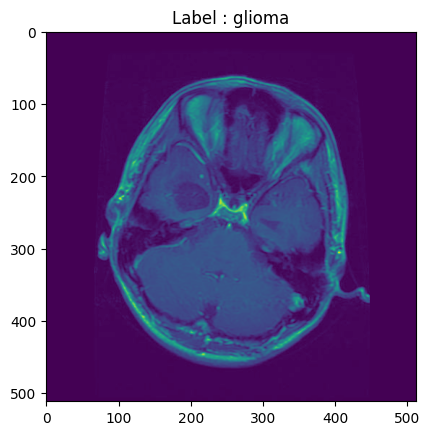

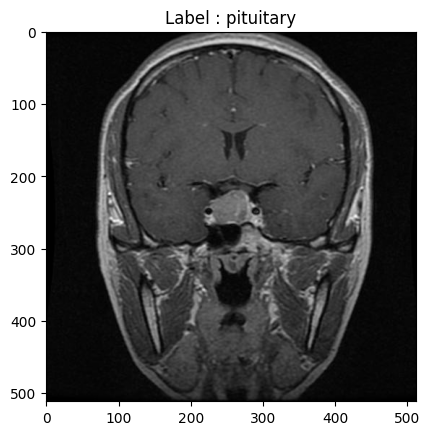

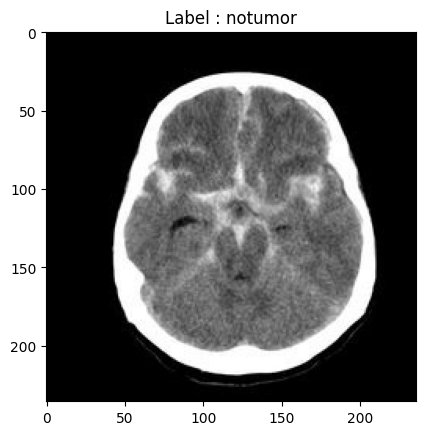

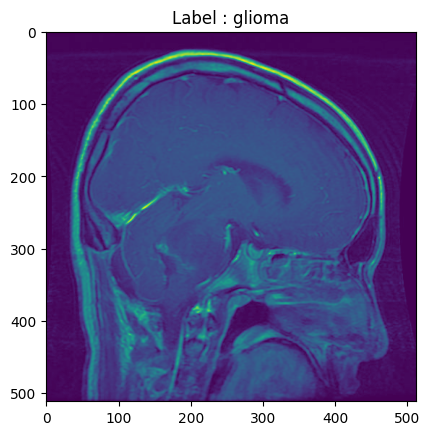

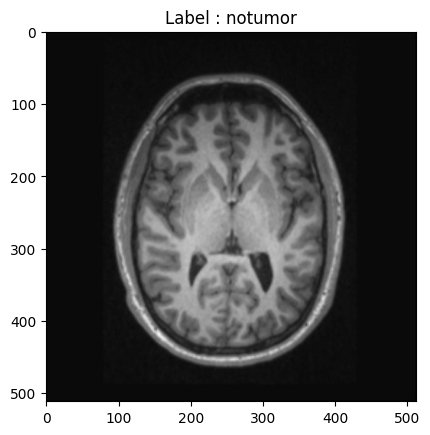

In [20]:
sample_images = data.sample(5)
for _, row in sample_images.iterrows():
    img_path = os.path.join(image_folder, row['image_name'])
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f"Label : {row['target']}")
    plt.show()

In [5]:
image_sizes = []

for img_name in data['image_name']:
    img_path = os.path.join(image_folder, img_name)
    with Image.open(img_path) as img:
        image_sizes.append(img.size)

print(set(image_sizes)) 


{(491, 624), (206, 244), (409, 442), (503, 369), (430, 483), (728, 725), (201, 251), (289, 354), (554, 554), (236, 226), (214, 216), (229, 214), (733, 781), (229, 223), (235, 257), (411, 501), (329, 310), (645, 439), (434, 512), (227, 262), (528, 528), (590, 332), (209, 241), (407, 485), (630, 423), (300, 359), (236, 203), (502, 502), (236, 221), (236, 239), (550, 664), (226, 213), (411, 496), (1024, 830), (374, 456), (235, 261), (329, 314), (355, 452), (626, 686), (276, 326), (300, 345), (210, 213), (1920, 1080), (359, 449), (201, 250), (221, 228), (192, 192), (236, 216), (225, 225), (202, 223), (410, 490), (605, 613), (216, 234), (208, 248), (350, 350), (444, 506), (450, 446), (442, 442), (339, 340), (534, 674), (257, 307), (402, 396), (341, 377), (224, 219), (421, 486), (926, 649), (213, 237), (341, 395), (825, 993), (236, 220), (447, 251), (235, 233), (622, 777), (494, 600), (208, 243), (228, 221), (239, 248), (600, 605), (314, 260), (201, 249), (341, 372), (224, 223), (212, 236), 

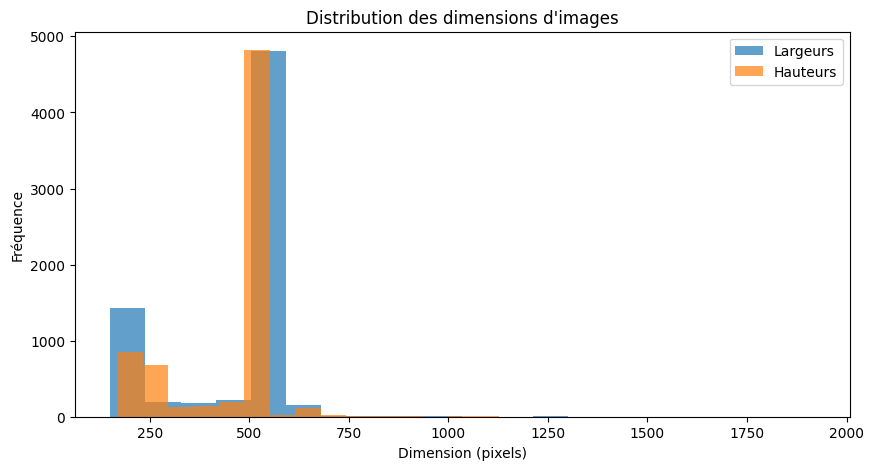

In [6]:
# Distribution des tailles d'images
widths, heights = zip(*image_sizes)
plt.figure(figsize=(10, 5))
plt.hist(widths, bins=20, alpha=0.7, label='Largeurs')
plt.hist(heights, bins=20, alpha=0.7, label='Hauteurs')
plt.legend()
plt.title("Distribution des dimensions d'images")
plt.xlabel("Dimension (pixels)")
plt.ylabel("Fréquence")
plt.show()

In [21]:
def preprocess_image(image_path, target_size):
    try:
        # Charger l'image
        image = Image.open(image_path).convert("RGB")
    
        
        image = ImageOps.fit(image, target_size, method=Image.Resampling.LANCZOS)
        
        return image
    except Exception as e:
        print(f"Erreur lors du traitement de l'image {image_path}: {e}")
        return None

In [22]:
target_size = (128, 128)
for image_name in data['image_name']:
    image_path = os.path.join(image_folder, image_name)
    
    if os.path.exists(image_path):
        processed_image = preprocess_image(image_path, target_size)
        if processed_image:
            output_image_path = os.path.join(output_folder, image_name)
            processed_image.save(output_image_path)
            #print(f"Image sauvegardée : {output_image_path}")
    else:
        print(f"Image manquante : {image_name}")

print("Prétraitement terminé et images sauvegardées dans 'processed_dataset'.")

Prétraitement terminé et images sauvegardées dans 'processed_dataset'.


In [35]:
class_mapping = {
    'notumor': 0,
    'pituitary': 1,
    'meningioma': 2,
    'glioma': 3
}
data['target'] = data['target'].map(class_mapping)
data.to_csv("dataset/metadata_encoded.csv", index=False)
print(data.head())

         image_name  target
0  Tr-glTr_0000.jpg       3
1  Tr-glTr_0001.jpg       3
2  Tr-glTr_0002.jpg       3
3  Tr-glTr_0003.jpg       3
4  Tr-glTr_0004.jpg       3


In [36]:
class_counts = data['target'].value_counts()
print("Répartition des classes :")
print(class_counts)

Répartition des classes :
target
0    2000
1    1757
2    1645
3    1621
Name: count, dtype: int64


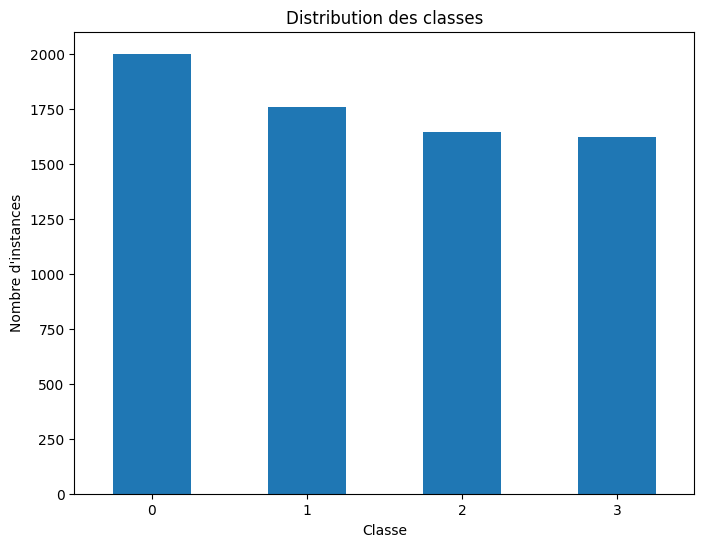

In [25]:
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title("Distribution des classes")
plt.xlabel("Classe")
plt.ylabel("Nombre d'instances")
plt.xticks(rotation=0)
plt.show()

In [27]:
def rotate_image(image_path, angle):
    with Image.open(image_path) as img:
        rotated_img = img.rotate(angle)  # Rotation de l'image
        return rotated_img

In [ ]:
balanced_folder = "dataset/balanced_dataset"
os.makedirs(balanced_folder, exist_ok=True)
max_class_count = data['target'].value_counts().max()
balanced_data = []

'dataset/balanced_dataset'

In [41]:
# Traiter chaque classe pour équilibrer les données
for target in data['target'].unique():
    # Filtrer les images de la classe actuelle
    class_data = data[data['target'] == target]
    current_class_count = len(class_data)
    
    # Ajouter les images originales dans les données équilibrées
    for index, row in class_data.iterrows():
        balanced_data.append({'image_name': row['image_name'], 'target': row['target']})
    
    # Si la classe est sous-représentée, on fait une augmentation par rotation
    if current_class_count < max_class_count:
        # Calculer combien d'images supplémentaires sont nécessaires
        num_needed = max_class_count - current_class_count
        
        # Ajouter des images rotatées pour équilibrer la classe
        for index, row in class_data.iterrows():
            image_name = row['image_name']
            src_path = os.path.join(output_folder, image_name)
            
            # Créer les nouvelles images avec des rotations (par exemple, 90, 180, 270 degrés)
            for angle in [90, 180, 270]:
                rotated_img = rotate_image(src_path, angle)
                rotated_image_name = f"rotated_{angle}_{image_name}"
                rotated_image_path = os.path.join(balanced_folder, rotated_image_name)
                
                # Sauvegarder l'image dans le dossier
                rotated_img.save(rotated_image_path)
                
                # Ajouter l'image à la liste des données équilibrées
                balanced_data.append({'image_name': rotated_image_name, 'target': target})
                
                # Si on a assez d'images pour cette classe, arrêter la génération
                if len([item for item in balanced_data if item['target'] == target]) >= max_class_count:
                    break
            
            # Si le nombre souhaité d'images est atteint, arrêter
            if len([item for item in balanced_data if item['target'] == target]) >= max_class_count:
                break

In [ ]:
balanced_df = pd.DataFrame(balanced_data)

for index, row in balanced_df.iterrows():
    image_name = row['image_name']
    src_path = os.path.join(output_folder, image_name)
    dest_path = os.path.join(balanced_folder, image_name)
    
    if not os.path.exists(dest_path):
        shutil.copy(src_path, dest_path)

balanced_df.to_csv("dataset/balanced_metadata.csv", index=False)

print(f"Dataset équilibré créé dans {balanced_folder} et étiquettes sauvegardées dans 'balanced_metadata.csv'.")

Dataset équilibré créé dans dataset/balanced_dataset et étiquettes sauvegardées dans 'balanced_metadata.csv'.


In [45]:
data= balanced_df

In [46]:
print("Répartition des classes après rééquilibrage :")
print(data['target'].value_counts())

Répartition des classes après rééquilibrage :
target
3    2000
2    2000
0    2000
1    2000
Name: count, dtype: int64


Min: 0, Max: 255
Moyenne: 48.107037322998046, Écart-type: 51.478289924876975


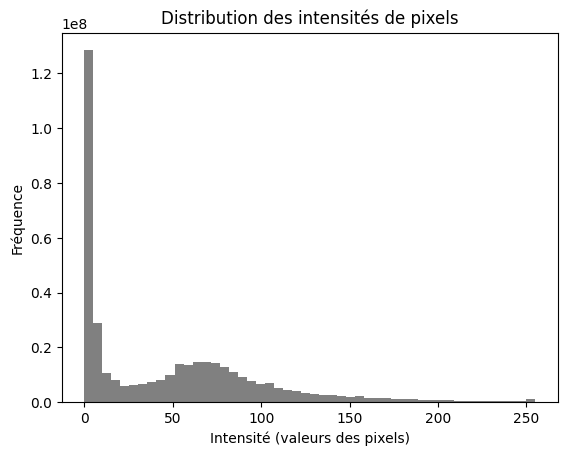

In [47]:
pixel_values = []

for img_name in data['image_name']:
    img_path = os.path.join(balanced_folder, img_name)
    with Image.open(img_path) as img:
        pixel_values.append(np.array(img).flatten())

pixel_values = np.concatenate(pixel_values)

# Statistiques sur les pixels
print(f"Min: {pixel_values.min()}, Max: {pixel_values.max()}")
print(f"Moyenne: {pixel_values.mean()}, Écart-type: {pixel_values.std()}")

# Histogramme des valeurs de pixels
plt.hist(pixel_values, bins=50, color='gray')
plt.title("Distribution des intensités de pixels")
plt.xlabel("Intensité (valeurs des pixels)")
plt.ylabel("Fréquence")
plt.show()
